In [47]:
# Naive Bayes implementation only on 2018's data

# Importing necessary dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [48]:
# DATA PREPROCESSING
trainingData = pd.read_csv("../Data/FIFAWorldCup2018.csv")
print("Dimensions of FIFA WC 2018: {}rows X {}columns".format(trainingData.shape[0],trainingData.shape[1]))

namesOfColumnsToBeDropped = ["date_GMT","status","attendance","referee","stadium_name", "team_a_xg", "team_b_xg", "btts_percentage_pre_match", 
"over_15_percentage_pre_match", "over_25_percentage_pre_match","over_35_percentage_pre_match", "over_45_percentage_pre_match",
"over_15_HT_FHG_percentage_pre_match", "over_05_HT_FHG_percentage_pre_match", "over_15_2HG_percentage_pre_match", "over_05_2HG_percentage_pre_match","timestamp","Game Week","home_team_name","away_team_name","home_team_goal_timings","away_team_goal_timings",'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg','odds_ft_home_team_win',
 'odds_ft_draw' ,'odds_ft_away_team_win' ,'odds_ft_over15', 'odds_ft_over25',
 'odds_ft_over35', 'odds_ft_over45', 'odds_btts_yes', 'odds_btts_no','total_goal_count', 'total_goals_at_half_time', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time','home_team_first_half_cards', 'home_team_second_half_cards', 'away_team_first_half_cards', 'away_team_second_half_cards','average_goals_per_match_pre_match', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match']

trainingData = trainingData.drop(namesOfColumnsToBeDropped,axis=1)

print("Dimensions of FIFA WC 2018 after dropping attributes: {}rows X {}columns".format(trainingData.shape[0],trainingData.shape[1]))

home_team_result = []

#Generating prediction classes W,D,L where W = Win, D = Draw, L = Loss
for index,match in trainingData.iterrows():
    if(match["home_team_goal_count"]>match["away_team_goal_count"]):
        #print("{} {}:{} {}\t Home team won".format(match["home_team_name"],match["home_team_goal_count"],match["away_team_goal_count"],match["away_team_name"]))
        # Adding home_team_result attribute to get result of team1
        home_team_result.append("W")
    
    if(match["home_team_goal_count"]<match["away_team_goal_count"]):
        #print("{} {}:{} {}\t Away team won".format(match["home_team_name"],match["home_team_goal_count"],match["away_team_goal_count"],match["away_team_name"]))
        # Adding home_team_result attribute to get result of team1
        home_team_result.append("L")

    if(match["home_team_goal_count"]==match["away_team_goal_count"]):
        #print("{} {}:{} {}\t Draw".format(match["home_team_name"],match["home_team_goal_count"],match["away_team_goal_count"],match["away_team_name"]))
        # Adding home_team_result attribute to get result of team1
        if((match["home_team_goal_count"]/match["home_team_shots"])>=(match["away_team_goal_count"]/match["away_team_shots"])):
            home_team_result.append("W")   
        if((match["home_team_goal_count"]/match["home_team_shots"])<(match["away_team_goal_count"]/match["away_team_shots"])):
            home_team_result.append("L")

trainingData["home_team_result"] = home_team_result

#Writing Dataset.csv
trainingData.to_csv('../Data/Dataset1.csv',index=False)

display(trainingData)

Dimensions of FIFA WC 2018: 64rows X 64columns
Dimensions of FIFA WC 2018 after dropping attributes: 64rows X 18columns


,home_team_goal_count,away_team_goal_count,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,home_team_result
0,5,0,6,2,1,0,1,0,11,4,8,0,3,4,22,10,38,62,W
1,0,1,0,5,2,0,0,0,7,12,4,6,3,6,12,6,41,59,L
2,0,1,5,2,1,0,3,0,10,9,4,3,6,6,22,14,67,33,L
3,3,3,4,5,1,0,1,0,7,12,4,7,3,5,12,10,33,67,W
4,2,1,5,1,1,0,3,0,11,5,6,2,5,3,16,19,55,45,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2,2,6,8,1,0,4,0,13,15,6,4,7,11,25,18,35,65,W
60,1,0,4,5,2,0,3,0,14,9,6,4,8,5,6,16,36,64,W
61,2,1,8,4,2,0,1,0,19,9,8,3,11,6,23,14,55,45,W
62,2,0,4,5,1,0,2,0,8,14,5,7,3,7,11,4,42,58,W


In [49]:
# TRAINING AND TESTING DATA PREPARATION
targets = trainingData["home_team_result"]
features = trainingData.drop("home_team_result",axis=1).values
print(targets)
featuresTrain, targetsTrain = features[0:47], targets[0:47]
featuresTest, targetsTest = features[47:], targets[47:]


0     W
1     L
2     L
3     W
4     W
     ..
59    W
60    W
61    W
62    W
63    W
Name: home_team_result, Length: 64, dtype: object


In [50]:
# DEFINE GAUSSIAN MODEL, TRAIN AND TEST
model = GaussianNB()

#Training model
model.fit(featuresTrain,targetsTrain)
print("Naive Bayes accuracy: ",model.score(featuresTest,targetsTest))


Naive Bayes accuracy:  0.6470588235294118


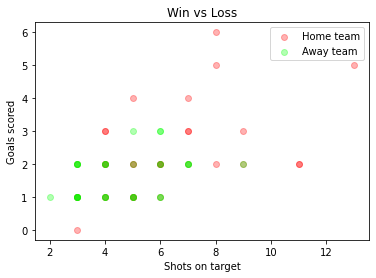

In [51]:
# DATA VISUALIZATION
W = trainingData[trainingData.home_team_result=="W"]
L = trainingData[trainingData.home_team_result=="L"]
plt.title("Win vs Loss")
plt.xlabel("Shots on target")
plt.ylabel("Goals scored")
plt.scatter(W.home_team_shots_on_target, W.home_team_goal_count, color = "red", label = "Home team", alpha = 0.3)
plt.scatter(L.away_team_shots_on_target, L.away_team_goal_count, color = "lime", label = "Away team", alpha = 0.3)
plt.legend()
plt.show()

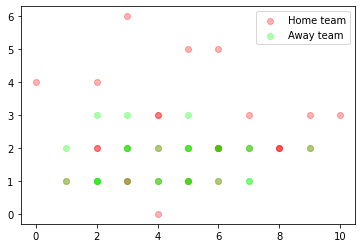

In [56]:
plt.scatter(W.home_team_corner_count, W.home_team_goal_count, color = "red", label = "Home team", alpha = 0.3)
plt.scatter(L.away_team_corner_count, L.away_team_goal_count, color = "lime", label = "Away team", alpha = 0.3)
plt.legend()
plt.show()